In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm
from scipy import stats
import xlrd
from datetime import datetime, date
import re
import matplotlib.ticker as mtick
from plotnine import *

In [ ]:
from google.colab import data_table
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [ ]:
t = pd.read_excel('/content/drive/MyDrive/QVI/QVI_transaction_data.xlsx')
t

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
#Convert date format
t['DATE'] = t['DATE'].apply(lambda x: xlrd.xldate_as_datetime(int(x), 0).date() if pd.notnull(x) else None)


In [ ]:
t

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
missing_values = t.isnull().sum()

missing_values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [ ]:
word_summary = t['PROD_NAME'].str.split(expand=True).stack().value_counts()
word_summary

175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 220, dtype: int64

In [ ]:
#Remove products that are not chips
t = t[~t['PROD_NAME'].str.contains('Salsa', case=False)]
t

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
t.shape

(246742, 8)

In [ ]:
#Summarize
t.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
#Outliers
z_scores = stats.zscore(t['PROD_QTY'])
threshold = 3

# Get indices of outliers
outlier_PROD_QTY = np.where(np.abs(z_scores) > threshold)[0]
outlier_TOT_SALES = np.where(np.abs(z_scores) > threshold)[0]

#Remove Outliers (after finding that outliers won't affect the analysis)
t = t.drop(outlier_PROD_QTY, axis=0, errors='ignore')
t = t.drop(outlier_TOT_SALES, axis=0, errors='ignore')

In [ ]:
# Extract the first words to form a brand column
t['BRAND'] = t['PROD_NAME'].str.split().str[0]
t

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


In [ ]:
brand = t['BRAND'].unique()
brand

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Woolworths',
       'Snbts', 'Cheetos', 'Sunbites'], dtype=object)

In [ ]:
t['BRAND'] = t['BRAND'].replace('Red', 'RRD')
t['BRAND'] = t['BRAND'].replace('Snbts', 'Sunbites')
t['BRAND'] = t['BRAND'].replace('Infzns', 'Infuzions')
t['BRAND'] = t['BRAND'].replace('WW', 'Woolworths')
t['BRAND'] = t['BRAND'].replace('Smith', 'Smiths')
t['BRAND'] = t['BRAND'].replace('NCC', 'Natural')
t['BRAND'] = t['BRAND'].replace('Dorito', 'Doritos')
t['BRAND'] = t['BRAND'].replace('Grain', 'GrnWves')
t

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


In [ ]:
t['BRAND'].value_counts()

Kettle        41172
Smiths        30258
Doritos       25165
Pringles      25021
RRD           16276
Infuzions     14156
Thins         14039
Woolworths    11795
Cobs           9648
Tostitos       9443
Twisties       9431
GrnWves        7717
Natural        7456
Tyrrells       6425
Cheezels       4591
CCs            4539
Sunbites       2997
Cheetos        2919
Burger         1562
French         1415
Name: BRAND, dtype: int64

In [ ]:
#Form a new column for packsize
t['PACK_SIZE'] = t['PROD_NAME'].str.findall(r'\d+').str.join('')
t

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths,330
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150


In [ ]:
t['PACK_SIZE'].value_counts()

[175]    66206
[150]    40090
[134]    25021
[110]    22303
[170]    19938
[165]    15252
[330]    12500
[380]     6404
[270]     6270
[210]     6255
[200]     4457
[135]     3245
[250]     3161
[90]      2997
[190]     2989
[160]     2961
[220]     1562
[70]      1501
[180]     1462
[125]     1451
Name: PACK_SIZE, dtype: int64

In [ ]:
c = pd.read_csv('/content/drive/MyDrive/Other/QVI_purchase_behaviour.csv')
c

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
c['LYLTY_CARD_NBR'].value_counts()


1000       1
181211     1
181217     1
181216     1
181215     1
          ..
88126      1
88127      1
88128      1
88129      1
2373711    1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

In [ ]:
c['LIFESTAGE'].value_counts()


RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [ ]:
c['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
#Check the missing values
c.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
#Merge two datasets using left join
m = pd.merge(t, c, on='LYLTY_CARD_NBR', how='left')
m

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,[175],YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,[175],MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,[170],MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,[150],MIDAGE SINGLES/COUPLES,Budget
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths,[330],MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246020,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,[175],YOUNG SINGLES/COUPLES,Premium
246021,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,[175],YOUNG SINGLES/COUPLES,Premium
246022,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,[170],YOUNG SINGLES/COUPLES,Premium
246023,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,[150],YOUNG SINGLES/COUPLES,Premium


# Data Analysis on Customer Segments

In [ ]:
#1. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
#2. How many customers are in each segment
#3. How many chips are bought per customer by segment
#4. What’s the average chip price by customer segment

In [ ]:
from plotnine import *

# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
m0 = m.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(CUSTOMERS=('LYLTY_CARD_NBR','nunique')).reset_index().sort_values('CUSTOMERS', ascending=False)
m0['Percentage_Customer'] = m0['CUSTOMERS'] / m0['CUSTOMERS'].sum() * 100
m0

,LIFESTAGE,PREMIUM_CUSTOMER,CUSTOMERS,Percentage_Customer
19,YOUNG SINGLES/COUPLES,Mainstream,7916,11.111267
13,RETIREES,Mainstream,6358,8.924386
10,OLDER SINGLES/COUPLES,Mainstream,4850,6.807686
9,OLDER SINGLES/COUPLES,Budget,4846,6.802072
11,OLDER SINGLES/COUPLES,Premium,4682,6.571874
6,OLDER FAMILIES,Budget,4611,6.472215
12,RETIREES,Budget,4382,6.150780
15,YOUNG FAMILIES,Budget,3947,5.540193
14,RETIREES,Premium,3811,5.349297
18,YOUNG SINGLES/COUPLES,Budget,3647,5.119099


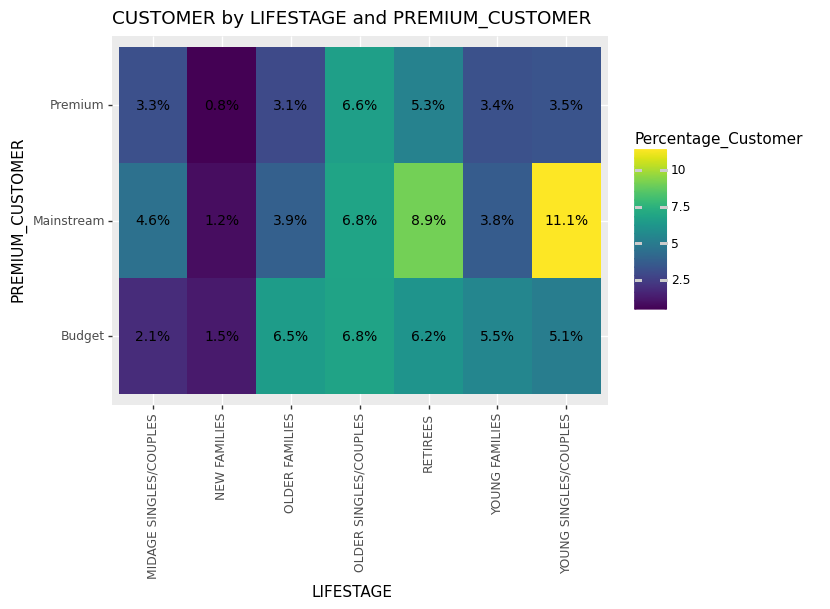

In [ ]:
# Create plot
plot0 = (
    ggplot(m0) +
    geom_tile(aes(x='LIFESTAGE', y='PREMIUM_CUSTOMER', fill='Percentage_Customer')) +
    geom_text(aes(x='LIFESTAGE', y='PREMIUM_CUSTOMER', label='Percentage_Customer'),
              format_string='{:,.1f}%', size=10, color='black') +
    labs(x='LIFESTAGE', y='PREMIUM_CUSTOMER', fill='Percentage_Customer') +
    theme(axis_text_x=element_text(rotation=90)) +
    ggtitle('CUSTOMER by LIFESTAGE and PREMIUM_CUSTOMER')
)
print(plot0)


**Portion of Customers by LIFESTAGE and PREMIUM_CUSTOMER**

The customer from the segments of Mainstream-Young Singles/Couples, Mainstream-Retirees, Older Singles/Couples from Both Mainstream and Budget take a larger portion of the total customers who buy chips.

1.Sales by LIFESTAGE and PREMIUM_CUSTOMER

In [ ]:
#Sales by LIFESTAGE and PREMIUM_CUSTOMER
m1 = m.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(SALES=('TOT_SALES', 'sum')).reset_index().sort_values('SALES', ascending=False)
m1['Percentage_Sales'] = m1['SALES'] / m1['SALES'].sum() * 100
m1

,LIFESTAGE,PREMIUM_CUSTOMER,SALES,Percentage_Sales
6,OLDER FAMILIES,Budget,156525.75,8.689801
19,YOUNG SINGLES/COUPLES,Mainstream,147492.40,8.188299
13,RETIREES,Mainstream,144951.65,8.047244
15,YOUNG FAMILIES,Budget,128962.55,7.159582
9,OLDER SINGLES/COUPLES,Budget,127503.10,7.078558
10,OLDER SINGLES/COUPLES,Mainstream,124273.70,6.899272
11,OLDER SINGLES/COUPLES,Premium,123283.65,6.844307
12,RETIREES,Budget,105519.10,5.858077
7,OLDER FAMILIES,Mainstream,96100.85,5.335207
14,RETIREES,Premium,90897.35,5.046325


In [ ]:
print(m1.columns)

Index(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'SALES', 'Percentage_Sales'], dtype='object')


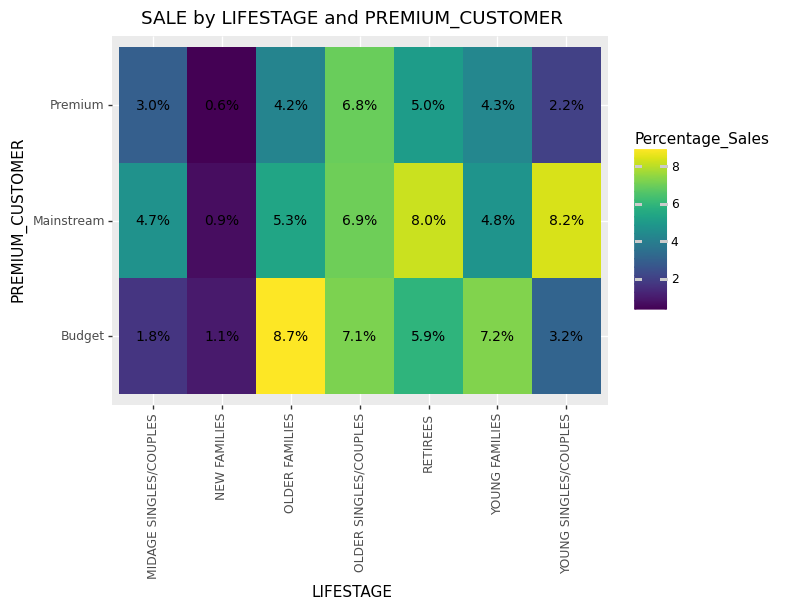

In [ ]:
###Visualization
plot1 = (
    ggplot(m1) +
    geom_tile(aes(x='LIFESTAGE', y='PREMIUM_CUSTOMER', fill='Percentage_Sales')) +
    geom_text(aes(x='LIFESTAGE', y='PREMIUM_CUSTOMER', label='Percentage_Sales'),
              format_string='{:,.1f}%', size=10, color='black') +
    labs(x='LIFESTAGE', y='PREMIUM_CUSTOMER', fill='Percentage_Sales') +
    theme(axis_text_x=element_text(rotation=90)) +
    ggtitle('SALE by LIFESTAGE and PREMIUM_CUSTOMER')
)
print(plot1)


**Conclusion: Sales by LIFESTAGE and PREMIUM_CUSTOMER**

For the sales of chips, the segments of Budget-Older Families, Mainstream-Retirees, Mainstream-Young Singles/Couples contribute the most to the sales.

2.Avg Units by LIFESTAGE and PREMIUM_CUSTOMER


In [ ]:
#Avg number of units bought by per customer
m2 = m.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / m.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
m2 = m2.reset_index().rename(columns={0: 'avg_units'}).sort_values('avg_units', ascending=False)
m2



,LIFESTAGE,PREMIUM_CUSTOMER,avg_units
7,OLDER FAMILIES,Mainstream,9.228920
8,OLDER FAMILIES,Premium,9.220826
6,OLDER FAMILIES,Budget,9.056387
17,YOUNG FAMILIES,Premium,8.689195
15,YOUNG FAMILIES,Budget,8.689131
16,YOUNG FAMILIES,Mainstream,8.623464
9,OLDER SINGLES/COUPLES,Budget,6.767231
11,OLDER SINGLES/COUPLES,Premium,6.755019
10,OLDER SINGLES/COUPLES,Mainstream,6.702474
1,MIDAGE SINGLES/COUPLES,Mainstream,6.421420


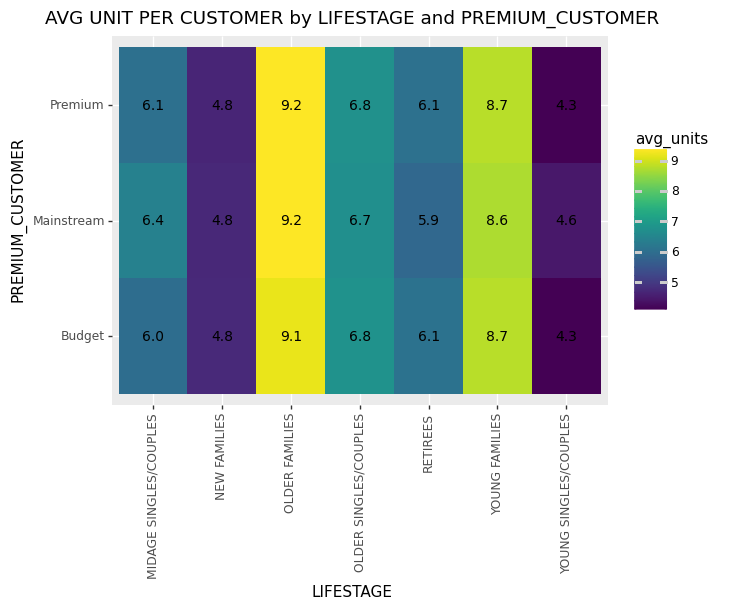

In [ ]:
plot2 = (
    ggplot(m2) +
    geom_tile(aes(x='LIFESTAGE', y='PREMIUM_CUSTOMER', fill='avg_units')) +
    geom_text(aes(x='LIFESTAGE', y='PREMIUM_CUSTOMER', label='avg_units'),
              format_string='{:,.1f}', size=10, color='black') +
    labs(x='LIFESTAGE', y='PREMIUM_CUSTOMER', fill='avg_units') +
    theme(axis_text_x=element_text(rotation=90)) +
    ggtitle('AVG UNIT PER CUSTOMER by LIFESTAGE and PREMIUM_CUSTOMER')
)
print(plot2)



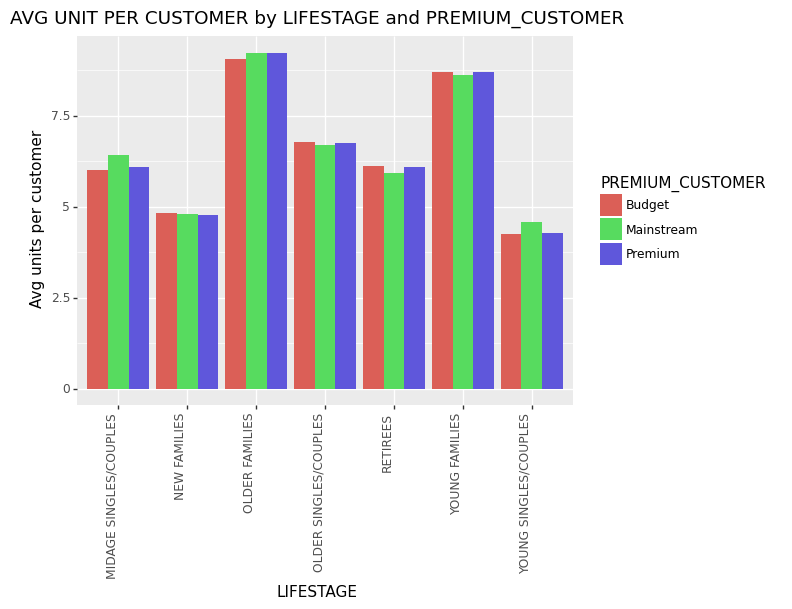

In [ ]:
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, position_dodge

# Create the plot
plot2_1 = (
    ggplot(m2, aes(x='LIFESTAGE', y='avg_units', fill='PREMIUM_CUSTOMER')) +
    geom_bar(stat='identity', position='dodge') +
    labs(x='LIFESTAGE', y='Avg units per customer', fill='PREMIUM_CUSTOMER') +
    theme(axis_text_x=element_text(angle=90, vjust=1, hjust=1)) +
    ggtitle('AVG UNIT PER CUSTOMER by LIFESTAGE and PREMIUM_CUSTOMER')
)

print(plot2_1)



**Conclusion: Avg Unit Per Customer by LIFESTAGE and PREMIUM_CUSTOMER**

The older familes and the young families from all three premium_customer groups, which are Budget, Mainstream, and Premium buy more units than other segments.

3.Avg Price by LIFESTAGE and PREMIUM_CUSTOMER

In [ ]:
#Avg price per unit by LIFESTAGE and PREMIUM_CUSTOMER
m3 = m.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / m.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
m3 = m3.reset_index().rename(columns={0: 'avg_price'}).sort_values('avg_price', ascending=False)
m3

,LIFESTAGE,PREMIUM_CUSTOMER,avg_price
19,YOUNG SINGLES/COUPLES,Mainstream,4.074263
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994040
4,NEW FAMILIES,Mainstream,3.939879
12,RETIREES,Budget,3.931852
3,NEW FAMILIES,Budget,3.931585
14,RETIREES,Premium,3.923231
11,OLDER SINGLES/COUPLES,Premium,3.898051
9,OLDER SINGLES/COUPLES,Budget,3.888001
5,NEW FAMILIES,Premium,3.886549
13,RETIREES,Mainstream,3.853457


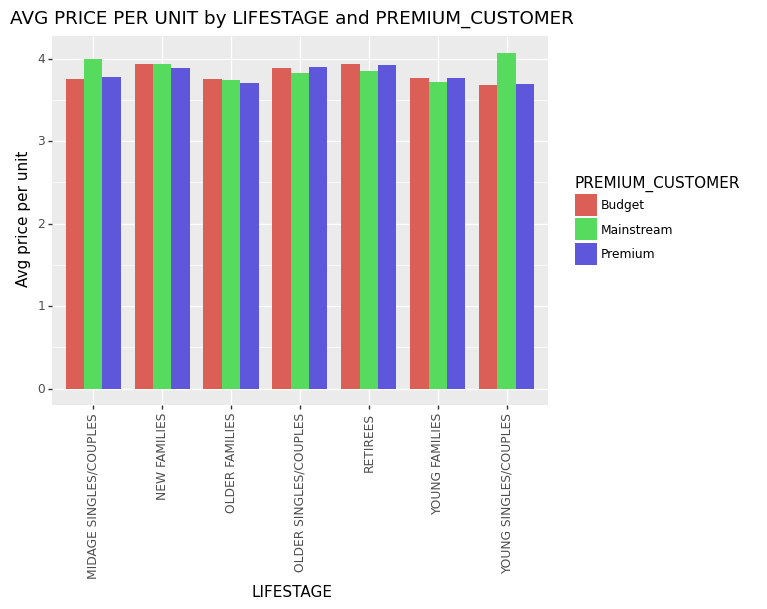

In [ ]:
#Visualization
plot3 = (
    ggplot(m3) +
    aes(x='LIFESTAGE', y='avg_price', fill='PREMIUM_CUSTOMER') +
    geom_bar(position=position_dodge(width=0.8), stat='identity', width=0.8) +
    labs(x='LIFESTAGE', y='Avg price per unit', fill='PREMIUM_CUSTOMER') +
    theme(axis_text_x=element_text(angle=90, vjust=1, hjust=1.1)) +
    ggtitle('AVG PRICE PER UNIT by LIFESTAGE and PREMIUM_CUSTOMER')
)

print(plot3)

**Conclusion: Avg Price by LIFESTAGE and PREMIUM_CUSTOMER**

There is not so much difference for the price amonng the groups, while MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES from Mainstream have slightly higher price than others. We need to investigate if the price is statistically significant.

In [ ]:
#Perform t test to test the significance for Midage Singles/Couples and Young Singles/Couples of Mainstream
import scipy.stats as stats

pricePerUnit = m.assign(price=m['TOT_SALES'] / m['PROD_QTY'])

group1 = pricePerUnit[(pricePerUnit['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) &
                      (pricePerUnit['PREMIUM_CUSTOMER'] == "Mainstream")]
group2 = pricePerUnit[(pricePerUnit['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) &
                      (pricePerUnit['PREMIUM_CUSTOMER'] != "Mainstream")]

t_stat, p_value = stats.ttest_ind(group1['price'], group2['price'], alternative='greater')

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

#T-statistics is large: large difference of means between two groups

#P-Value extremely small: stronger evidence against the null hypothesis (here the mean price per unit is the same for both groups)
#therefore there is siginifcant difference for the mean price per unit between two groups, reject the null hypothesis.

#The unit price for mainstream, young and mid-age singles and
#couples are significantly higher than that of budget or premium, young and midage singles and couples.

T-Statistic: 37.76179170931118
P-Value: 1.507779650921762e-308


**Result Interpretation for Mainstream-Young Singles/Couples and Mainstream-Midage Singles/Couples**

T-statistics is large: large difference of means between two groups

P-Value extremely small: stronger evidence against the null hypothesis (here the mean price per unit is the same for both groups). Therefore there is siginifcant difference for the mean price per unit between two groups, reject the null hypothesis.

The unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

In [ ]:
#6. The customer’s total spend over the period and total spend for each transaction to understand what
# proportion of their grocery spend is on chips


In [ ]:
#7. Proportion of customers in each customer segment overall to compare against the mix of customers
# who purchase chips

# **Futher Analysis On Mainstream-Young Singles/Couples**

Since Mainstream-Young Singles/Couples takes a larger portion on portion of customers, portion of sales, and avg price/unit (only out of avg unit/customer), we want to futher investigate their purchasing behavior to retain the customer segment.

In [ ]:
#Brand Affinity

s0 = m[~((m['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (m['PREMIUM_CUSTOMER'] == "Mainstream"))]
s1 = m[(m['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (m['PREMIUM_CUSTOMER'] == "Mainstream")]


# Brand affinity compared to the rest of the population
QTY_s0 = s0['PROD_QTY'].sum()
QTY_s1 = s1['PROD_QTY'].sum()
QTY_BRAND_s0= s0.groupby('BRAND').agg(other=('PROD_QTY', 'sum')) / QTY_s0
QTY_BRAND_s1 = s1.groupby('BRAND').agg(targetSegment=('PROD_QTY', 'sum')) / QTY_s1


In [ ]:
brand_p = QTY_BRAND_s0.merge(QTY_BRAND_s1, on='BRAND')
brand_p['affinityToBrand'] = brand_p['targetSegment'] / brand_p['other']
brand_p = brand_p.sort_values(by='affinityToBrand', ascending=False)
brand_p


,other,targetSegment,affinityToBrand
BRAND,,,
Tyrrells,0.025679,0.031518,1.227379
Twisties,0.037853,0.046214,1.220876
Doritos,0.101956,0.122731,1.203765
Tostitos,0.037939,0.045441,1.197740
Kettle,0.165422,0.198061,1.197306
Pringles,0.100493,0.119444,1.188585
Cobs,0.038931,0.044667,1.147337
Infuzions,0.056991,0.064722,1.135649
Thins,0.056950,0.060413,1.060809


**Result Interpretation**

From the affinity to brand of the target customer segment, we know that Mainstream-Young Singles/Couples are 23% more likely to buy Tyrrells than other segments, and they are 44% less likely to buy Burger chips compared to others. Therefore, we can adjust our inventory to retain the buying power of the customers.

In [ ]:
#Affinity to pack size
s0['PACK_SIZE'] = s0['PACK_SIZE'].astype(str)
s1['PACK_SIZE'] = s1['PACK_SIZE'].astype(str)

QTY_PACK_s0 = s0.groupby('PACK_SIZE').agg(other_p=('PROD_QTY', 'sum')) / QTY_s0
QTY_PACK_s1 = s1.groupby('PACK_SIZE').agg(targetSegment_p=('PROD_QTY', 'sum')) / QTY_s1
pack_p = QTY_PACK_s0.merge(QTY_PACK_s1, on='PACK_SIZE')
pack_p['affinityToPack'] = pack_p['targetSegment_p'] / pack_p['other_p']
pack_p = pack_p.sort_values(by='affinityToPack', ascending=False)
pack_p

<ipython-input-64-3a3ab02c5fa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-64-3a3ab02c5fa0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,other_p,targetSegment_p,affinityToPack
PACK_SIZE,,,
['270'],0.025082,0.031850,1.269850
['330'],0.050094,0.061324,1.224182
['380'],0.026510,0.032071,1.209746
['134'],0.100493,0.119444,1.188585
['110'],0.089609,0.106351,1.186826
['210'],0.025100,0.029143,1.161064
['135'],0.013058,0.014779,1.131776
['250'],0.012772,0.014364,1.124697
['170'],0.080969,0.080716,0.996870


In [ ]:
product_270 = t[t['PACK_SIZE'] == '270']['PROD_NAME'].unique()
product_270

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

**Result Interpretation**

The result shows that that Mainstream-Young Singles/Couples are 27% more likely to buy the pack size of 270, and they are 44% less likely to buy the pack size of 220. Also, only Twisties offer the pack size of 270, which may be the reason why Mainstream-Young Singles/Couples are 22% more willing to buy the brand.

# **Analysis Insight**

The analysis tested customers' purchasing behavior by four dimensions - proportion of customers, proportion of total sales, average price per unit, and average units bought by per customers, and customers are categorized into segments by LIFESTAGE and PREMIUM_CUSTOMER.

The segments that takes the largest proportion of customers are: Mainstream-Young Singles/Couples(11.1%), Mianstream-Retirees(8.9%), and Older Singles/Couples from Budget, Mainstream, and Premium (6.8%).

The sales of chips comes mostly from Budget-older Families(8.7%), Mainstream-Retirees(8%), and Mainstream-Young Singles/Couples(8.2%)

Older families and young families buy more units compared to others(9% for older families and 8% for younger families), which is reasonable that they have more people in the family compared to others.

The average price per unit of the chips has not so much difference among the groups, except that Mainstream-Midage Singles/Couples and Mainstream-Young Singles/Couples have slightly higher price than others. We test if the price has significant difference, and the test said yes, which means that the customer segments do pay higher price per unit for the purchase of chips.

We can notice that Mainstream-Young Singles/Couples show in three out of four dimensions, which are proportion of customers, proportion of sales, and average price per bag of chips, which means that the segment is important and we need to have more measures to retain the customers.

In terms of the importance of the group, we did further analysis for the gruop, and the result shows that they are 23% more affinite to the brand Tyrrells and Twisties, and they are 44% less affinite to Burger chips.

We also test their affinity to various pack sizes. The test tells that they are 27& more likely to buy the pack size of 270, and 44% less likely to buy the size of 220 compared to other groups. Also, only Twistes offers the size of 270, which may be one reason that the group is more affinite to the brand.

To sum up, we can do more further analysis for different customer segments to adjust to our inventory level based on brands and pack sizes to retain specific groups of customers.